In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ital_link='/kaggle/input/istat-italian-excursions-2014-2022/ISTAT_Italian_Excursion_2014_2022.csv'

ital_data=pd.read_csv(ital_link, index_col='Unnamed: 0')

ital_data = ital_data.rename(columns={
    'Unnamed: 0': 'id',
    'mese': 'month',
    'annrif': 'year',
    'progind': 'interview_id',
    'sesso': 'gender',
    'eta10': 'age_group',
    'staciv4': 'marital_status',
    'reg': 'region_code',
    'rip': 'italian_zone',
    'istr4': 'education_level',
    'condogg': 'employment_status',
    'posiz4': 'job_position',
    'ateco3': 'economic_sector',
    'cond4': 'simplified_employment_status',
    'ORARIO': 'employment_type',
    'RAPP': 'contract_type',
    'CODPROF7': 'profession_code',
    'progesc': 'excursion_id',
    'DEST_EIE': 'destination_country',
    'DEST_ERE': 'destination_region_code',
    'DEST_EI': 'destination_italian_region_code',
    'DEST_EPR': 'destination_city_code',
    'MOTESC': 'excursion_reason',
    'PARTESC': 'non_family_participants',
    'NPARTESC': 'number_of_participants',
    'EMEZZO': 'transportation',
    'TRIM': 'quarter'
})
ital_data

,month,year,interview_id,gender,age_group,marital_status,region_code,italian_zone,education_level,employment_status,...,profession_code,excursion_id,destination_country,destination_region_code,destination_city_code,excursion_reason,non_family_participants,number_of_participants,transportation,quarter
0,1,2014,16,2,1,1,170,4,1,0,...,0,1,1,17,77,5,1,4,5,1
1,3,2014,21,1,1,1,180,4,1,0,...,0,1,1,18,78,3,1,4,5,1
2,7,2014,33,1,4,3,150,4,2,1,...,2,1,1,15,63,1,2,1,3,3
3,7,2014,33,1,4,3,150,4,2,1,...,2,2,1,15,63,7,2,1,5,3
4,3,2014,39,2,8,4,40,2,1,3,...,0,1,1,4,22,2,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37824,1,2022,62880,1,5,2,30,1,2,1,...,5,1,1,2,7,1,1,4,5,1
37825,8,2022,62883,2,4,1,120,3,4,1,...,2,1,1,12,59,1,2,1,5,3
37826,12,2022,62899,1,6,2,40,2,3,1,...,2,1,1,4,21,9,1,3,5,4
37827,12,2022,62899,1,6,2,40,2,3,1,...,2,2,1,4,21,9,1,3,5,4


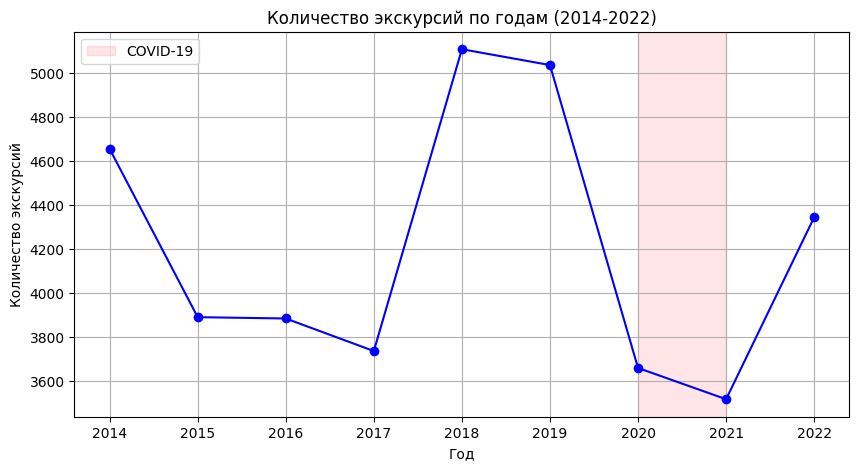

In [10]:
yearly_trend = ital_data.groupby('year').size() #группировка по годам для графика в период пандемии

plt.figure(figsize=(10, 5))
yearly_trend.plot(marker='o', linestyle='-', color='b')
plt.title('Количество экскурсий по годам (2014-2022)')
plt.xlabel('Год')
plt.ylabel('Количество экскурсий')
plt.grid(True)
plt.axvspan(2020, 2021, color='red', alpha=0.1, label='COVID-19') 
plt.legend()
plt.show()

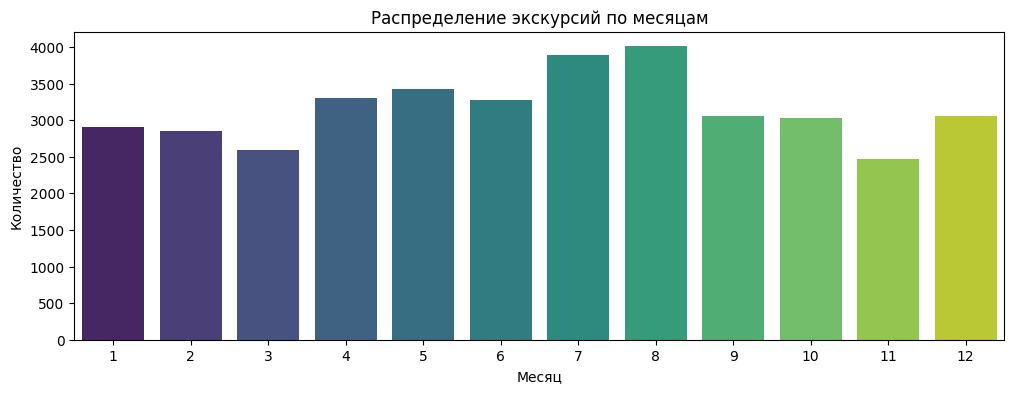

In [11]:
monthly_counts = ital_data['month'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Распределение экскурсий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#распределение категории и региона
le = LabelEncoder()
ital_data['gender_encoded'] = le.fit_transform(ital_data['gender'])
ital_data['region_encoded'] = le.fit_transform(ital_data['region_code'])

#признаки и целевая переменная
features = ['gender_encoded', 'age_group', 'education_level', 'region_encoded', 'employment_status']
X = ital_data[features]
y_reg = ital_data['month']  # для регрессии: предсказание месяца активности
y_cls = ital_data['excursion_reason']  # для классификации: причина поездки

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.3, random_state=42)

Accuracy: 0.5853379152348225
              precision    recall  f1-score   support

           1       0.61      0.94      0.74      6788
           2       0.32      0.09      0.14      2155
           3       0.11      0.02      0.03       196
           4       0.16      0.01      0.02       414
           5       0.08      0.02      0.03       264
           6       0.15      0.02      0.04       579
           7       0.09      0.01      0.01       250
           8       0.16      0.01      0.03       294
           9       0.53      0.04      0.07       226
          10       0.00      0.00      0.00        81
          11       0.00      0.00      0.00       102

    accuracy                           0.59     11349
   macro avg       0.20      0.11      0.10     11349
weighted avg       0.46      0.59      0.48     11349



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


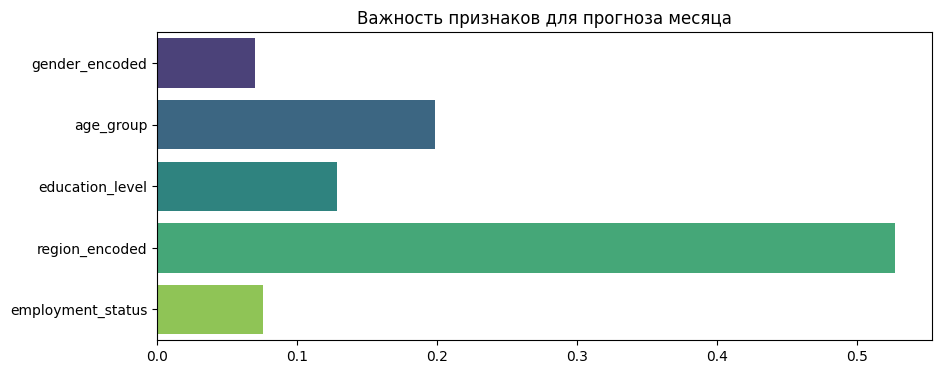

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_cls = RandomForestClassifier(n_estimators=100, random_state=42)
model_cls.fit(X_train, y_train_cls)  
y_pred_cls = model_cls.predict(X_test)

print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

plt.figure(figsize=(10, 4))
sns.barplot(x=model_cls.feature_importances_, y=features, palette='viridis')
plt.title('Важность признаков для прогноза месяца')
plt.show()

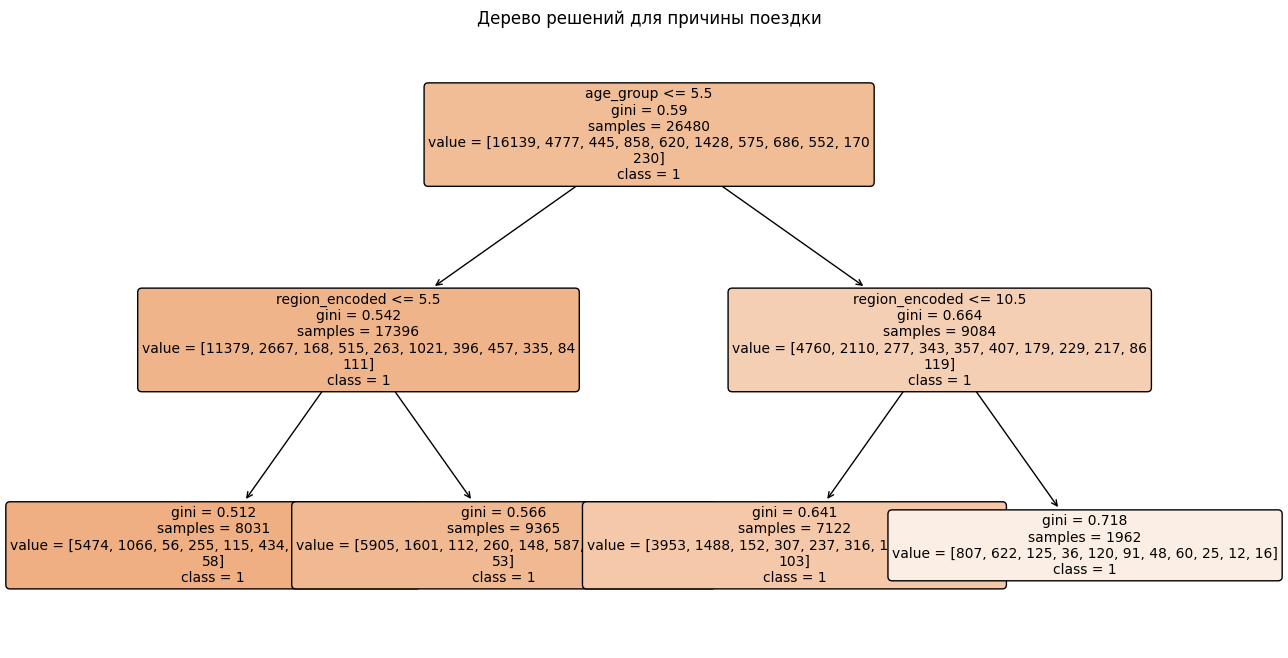

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model_cls = DecisionTreeClassifier(max_depth=2, random_state=42)
model_cls.fit(X_train_cls, y_train_cls)

features = X_train_cls.columns 
class_names = [str(cls) for cls in model_cls.classes_]  # конвертируем классы в строки

plt.figure(figsize=(15, 8))
plot_tree(
    model_cls,
    feature_names=features,
    class_names=class_names,
    filled=True,       
    rounded=True,       # скруглённые углы у блоков
    fontsize=10
)

plt.title('Дерево решений для причины поездки')
plt.show()

In [16]:
# так как  mae приблизительно равна почти трем месяцам, а accuracy 60%, необходим иной подход: 
# объединяем причины в 2 группы
ital_data['simple_reason'] = ital_data['excursion_reason'].apply(
    lambda x: 'Отдых/Развлечения' if x in ['Отдых', 'Шопинг', 'Гастрономия'] else 'Остальное'
)

print(ital_data['simple_reason'].value_counts())

simple_reason
Остальное    37829
Name: count, dtype: int64


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

features = ['age_group', 'region_encoded', 'employment_status']
X = ital_data[features]
y = ital_data['simple_reason']

print(ital_data[['age_group', 'simple_reason']].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

print("Классы в y_train:", np.unique(y_train))

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

age_group  simple_reason
5          Остальное        6985
6          Остальное        6565
4          Остальное        6065
1          Остальное        5178
7          Остальное        4696
3          Остальное        3785
2          Остальное        2702
8          Остальное        1853
Name: count, dtype: int64
Классы в y_train: ['Остальное']
Accuracy: 1.00


In [ ]:
#в simple reason только столбец остальное, оттого и accuracy=1.00. итог: модель ухудшена, а не улучшена

In [20]:
print(y_train.value_counts())
print(y_test.value_counts())

simple_reason
Остальное    26480
Name: count, dtype: int64
simple_reason
Остальное    11349
Name: count, dtype: int64


In [21]:
# добавление сезонов
season_map = {
    1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 
    7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1
}
ital_data['season'] = ital_data['month'].map(season_map)

print(ital_data[['month', 'season']].head())

   month  season
0      1       1
1      3       2
2      7       3
3      7       3
4      3       2


In [22]:
from sklearn.ensemble import RandomForestClassifier

features = ['age_group', 'region_encoded', 'education_level']
X = ital_data[features]
y = ital_data['season']

#предсказывание сезона, в котором проводилась экскурсия

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.30


In [ ]:
#вывод: предсказание сезона лучше, чем случайное (30%>25%)

In [ ]:
#наконец: предсказание причины поездки на основе признаков путешественника (пол, возраст, регион, образование и т.д.) с помощью случайного леса, оценка качества модели

              precision    recall  f1-score   support

           1       0.62      0.92      0.74      4533
           2       0.38      0.14      0.21      1461
           3       0.34      0.10      0.15       125
           4       0.28      0.11      0.16       273
           5       0.36      0.07      0.12       177
           6       0.17      0.03      0.05       367
           7       0.34      0.12      0.18       171
           8       0.15      0.02      0.03       189
           9       0.30      0.04      0.07       156
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00        65

    accuracy                           0.59      7566
   macro avg       0.27      0.14      0.16      7566
weighted avg       0.50      0.59      0.50      7566



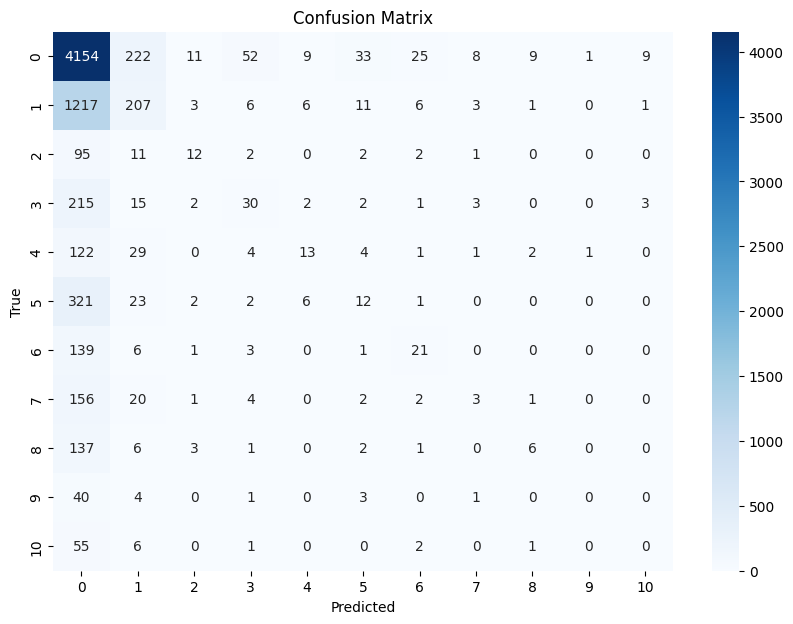

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

features = ['gender', 'age_group', 'region_code', 'education_level', 'employment_status', 'transportation']
X = ital_data[features]
y = ital_data['excursion_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
'''Итог: сам датасет изначально был из непроверенного источника, с неочищенными данными и сомнительной статистикой. 
Я потренировала анализ данных на основе графиков, нормализовала дату и попыталась выбрать наиболее 
оптимальные модели для такого датасета. Есть как провальная точность, так и результаты чуть получше'''

'Итог: сам датасет изначально был из непроверенного источника, с неочищенными данными и сомнительной статистикой. \nЯ потренировала анализ данных на основе графиков, нормализовала дату и попыталась выбрать наиболее '